In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets with a slight input tweak
invoices_df = pd.read_csv(open('fct_invoice.csv', 'r'))
customers_df = pd.read_json(path_or_buf='dim_customer.json')

# Display the first few rows of each dataframe
print("Invoices Data:")
print(invoices_df.head())   # replaced display() with print()
print("\nCustomers Data:")
print(customers_df.head())

Invoices Data:
  invoice_no  customer_id  category  quantity    price payment_method  \
0    I138884          229  Clothing         5  1500.40    Credit Card   
1    I317333         3433     Shoes         3  1800.51     Debit Card   
2    I127801          644  Clothing         1   300.08           Cash   
3    I173702         4900     Shoes         5  3000.85    Credit Card   
4    I337046         1089     Books         4    60.60           Cash   

  invoice_date   shopping_mall  
0     5/8/2022          Kanyon  
1   12/12/2021  Forum Istanbul  
2    9/11/2021       Metrocity  
3   16/05/2021    Metropol AVM  
4   24/10/2021          Kanyon  

Customers Data:
    age first_name gender  id last_name
0  48.0   Nicholas      M   0    Flores
1   NaN    Jeffery      M   1      Rowe
2  57.0     Alexis      F   2    Benton
3  73.0        Amy      F   3   Johnson
4  20.0      David      M   4     Moore


In [3]:
#EASY
#1. How many unique customers are in the dataset?

In [4]:
unique_customers = len(customers_df['id'].unique())
print("There are", unique_customers, "unique customers in the dataset.")

There are 5191 unique customers in the dataset.


In [6]:
#2. What are the different categories of products available? How many unique categories are there?

In [7]:
unique_categories = list(set(invoices_df['category']))
num_unique_categories = len(unique_categories)

print("The unique product categories are:", unique_categories)
print("\nThere are", num_unique_categories, "unique categories.")

The unique product categories are: ['Books', 'Clothing', 'Technology', 'Souvenir', 'Cosmetics', 'Food & Beverage', 'Shoes', 'Toys']

There are 8 unique categories.


In [8]:
#3. Which payment method is the most popular? How many times was it used?

In [9]:
payment_method_counts = invoices_df.groupby('payment_method').size()
most_popular_method = payment_method_counts.sort_values(ascending=False).index[0]
count = payment_method_counts.sort_values(ascending=False).iloc[0]

print("The most popular payment method is '" + most_popular_method + "'.")
print("It was used", count, "times.")

The most popular payment method is 'Cash'.
It was used 44447 times.


In [10]:
#MEDIUM
# Merge the two dataframes
df = invoices_df.join(customers_df.set_index('id'), on='customer_id')
print(df.head())

  invoice_no  customer_id  category  quantity    price payment_method  \
0    I138884          229  Clothing         5  1500.40    Credit Card   
1    I317333         3433     Shoes         3  1800.51     Debit Card   
2    I127801          644  Clothing         1   300.08           Cash   
3    I173702         4900     Shoes         5  3000.85    Credit Card   
4    I337046         1089     Books         4    60.60           Cash   

  invoice_date   shopping_mall   age   first_name gender last_name  
0     5/8/2022          Kanyon   NaN      William      M  Anderson  
1   12/12/2021  Forum Istanbul  34.0     Danielle      F    Rivera  
2    9/11/2021       Metrocity  46.0  Christopher      M  Stephens  
3   16/05/2021    Metropol AVM  46.0        Laura      F     Kelly  
4   24/10/2021          Kanyon   NaN      Richard      M    Rhodes  


In [11]:
#1. What are the three most popular categories, by total sales?

In [15]:
# Calculate total sales by multiplying quantity and price
df['sales'] = df['quantity'].mul(df['price'])

# Group by category and sum the sales
category_sales = df.pivot_table(values='sales', index='category', aggfunc='sum')

# Get the top 3 categories
top_3_categories = category_sales.sort_values(by='sales', ascending=False).head(3)
print("The three most popular categories by total sales are:")
print(top_3_categories)

The three most popular categories by total sales are:
                   sales
category                
Clothing    1.139968e+08
Shoes       6.655345e+07
Technology  5.786235e+07


In [14]:
#2. What are the total sales attributed to customers over the age of 45?

In [16]:
# Filter for customers over 45
customers_over_45 = df.query("age > 45")

# Calculate the total sales for this group
total_sales_over_45 = customers_over_45['sales'].aggregate('sum')

print("The total sales attributed to customers over the age of 45 is: ${:,.2f}".format(total_sales_over_45))

The total sales attributed to customers over the age of 45 is: $82,039,768.15


In [17]:
#3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

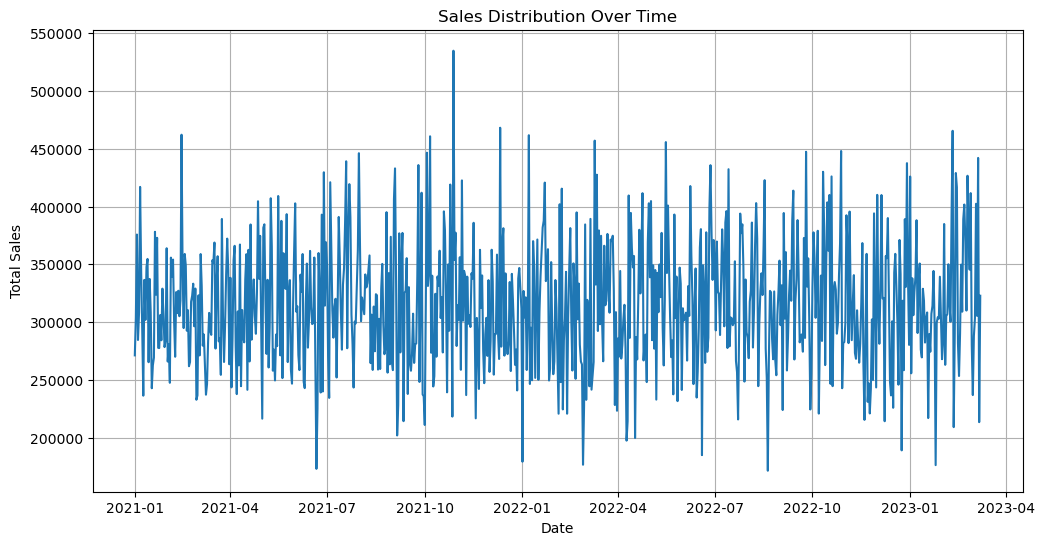

In [19]:
# Convert 'invoice_date' to datetime objects
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

# Group by date and sum the sales
daily_sales = df.pivot_table(values='sales', index='invoice_date', aggfunc='sum')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales)  # removed marker='o'
plt.title("Sales Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

In [20]:
#HARD
#1. Create a pivot table showing the breakdown of sales across category and decade age range.

In [24]:
# Create the decade age range bins and labels
bins = range(10, 81, 10)
labels = [f"{i}-{i+9}" for i in range(10, 80, 10)]

# Create the 'age_range' column
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Create the pivot table
pivot_table = df.pivot_table(values='sales', index='category', columns='age_range', aggfunc='sum')

# Display the pivot table
print(pivot_table)

age_range             10-19        20-29        30-39        40-49  \
category                                                             
Books              12801.75     79461.75     84143.10     87203.40   
Clothing         1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics         109619.36    605915.32    723544.70    665034.96   
Food & Beverage    13582.31     73491.96     87246.86     89553.29   
Shoes             993281.35   5924878.24   7200839.66   7025590.02   
Souvenir           12375.15     54943.32     64092.72     66391.80   
Technology       1129800.00   5261550.00   6159300.00   5954550.00   
Toys               60426.24    385100.80    420582.40    390906.88   

age_range              50-59        60-69       70-79  
category                                               
Books               74962.20     80476.80    54827.85  
Clothing         10321851.76  10660642.08  7769371.28  
Cosmetics          587780.96    649990.76   419082.62  
Food & Beverage    

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_13212\169043191.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='sales', index='category', columns='age_range', aggfunc='sum')
